        date   country  confirmed  recovered  deaths
0 2020-01-01  CountryA          0          0       0
1 2020-01-02  CountryA          1          0       0
2 2020-01-03  CountryA          3          1       0
3 2020-01-04  CountryA          7          2       1
4 2020-01-05  CountryA         10          3       1


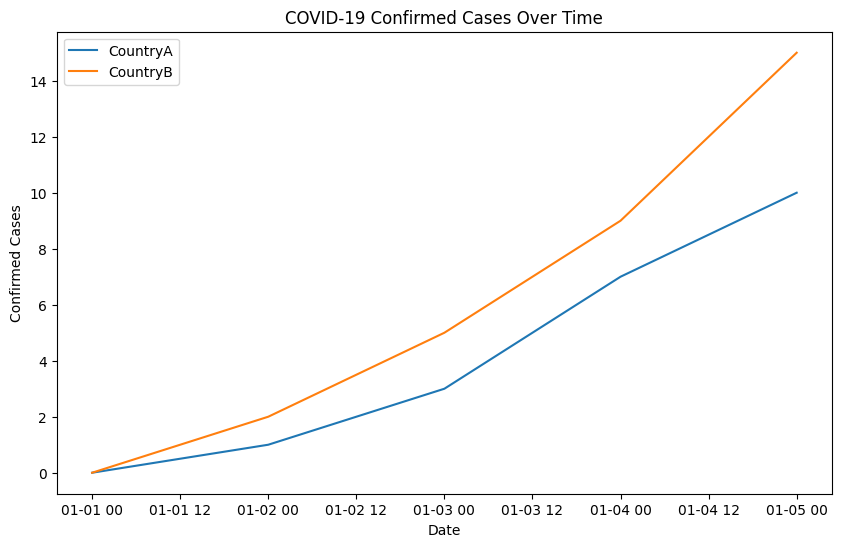

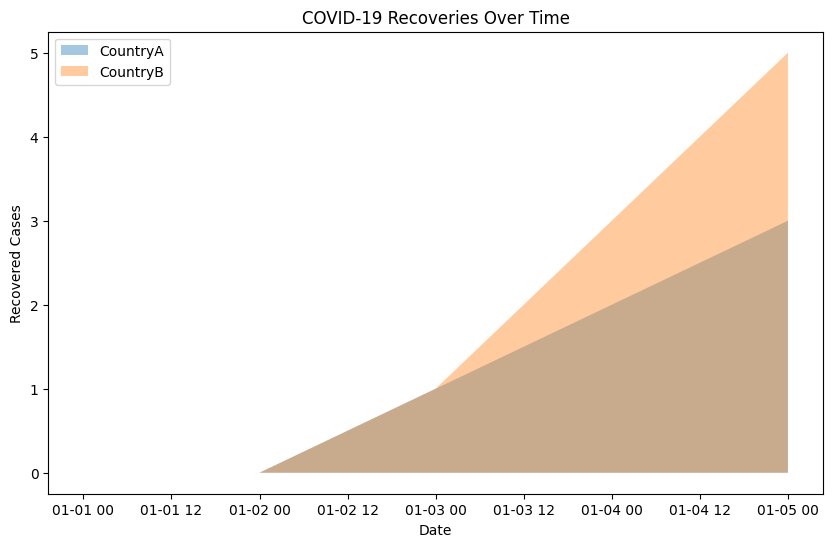

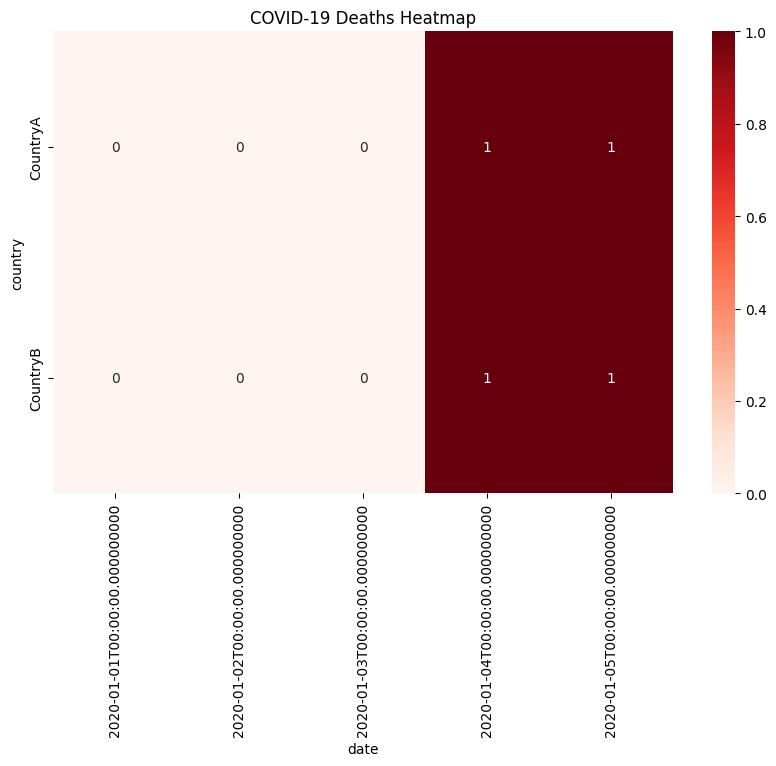

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('covid_data.csv')
df['date'] = pd.to_datetime(df['date'])

print(df.head())

plt.figure(figsize=(10,6))
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['date'], country_data['confirmed'], label=country)

plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.fill_between(country_data['date'], country_data['recovered'], alpha=0.4, label=country)

plt.title('COVID-19 Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.legend()
plt.show()

# Pivot table: rows=country, columns=date, values=deaths
pivot = df.pivot(index='country', columns='date', values='deaths')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title('COVID-19 Deaths Heatmap')
plt.show()

df.to_csv('cleaned_covid_data.csv', index=False)